# **Source Code Python Homework Final Project - Stage 2**

Kelompok 10/10: 

1. Herline Yastriska
2. Danu Prasetyo
3. Radisha Fanni Sianti
4. Innaufa Qonita Zurraya
5. Mutia Febriana Azzahra
6. Indah Nurcahyani



In [1]:
# Import package yang dibutuhkan
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as scp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from google.colab import files
import io
import csv

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Mengupload file
uploaded = files.upload()

Saving SBAnational.csv to SBAnational.csv


In [48]:
# Membaca dataset yang digunakan yaitu SBAnational.csv
# df = pd.read_csv('/content/drive/MyDrive/SBAnational.csv', error_bad_lines=False, warn_bad_lines=True)
df = pd.read_csv('SBAnational.csv', delimiter = ";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               898985 non-null  object 
 3   State              898985 non-null  object 
 4   Zip                898999 non-null  float64
 5   Bank               897440 non-null  object 
 6   BankState          897433 non-null  object 
 7   NAICS              898999 non-null  float64
 8   ApprovalDate       898999 non-null  object 
 9   ApprovalFY         898999 non-null  object 
 10  Term               898999 non-null  float64
 11  NoEmp              898999 non-null  float64
 12  NewExist           898863 non-null  float64
 13  CreateJob          898999 non-null  float64
 14  RetainedJob        898999 non-null  float64
 15  FranchiseCode      898999 non-null  float64
 16  Ur

In [49]:
# Mengubah tipe data menjadi object
df[['LoanNr_ChkDgt', 'Zip', 'NAICS','NewExist','UrbanRural','FranchiseCode']] = df[['LoanNr_ChkDgt', 'Zip', 'NAICS','NewExist','UrbanRural','FranchiseCode']].astype('object')

# Mengubah tipe data menjadi datetime
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'])

# Mengubah tipe data data menjadi float
df['DisbursementGross'] = df['DisbursementGross'].str.replace('[^\d\.]', '').astype(float)
df['BalanceGross'] = df['BalanceGross'].str.replace('[^\d\.]', '').astype(float)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('[^\d\.]', '').astype(float)
df['GrAppv'] = df['GrAppv'].str.replace('[^\d\.]', '').astype(float)
df['SBA_Appv'] = df['SBA_Appv'].str.replace('[^\d\.]', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  object        
 1   Name               899150 non-null  object        
 2   City               898985 non-null  object        
 3   State              898985 non-null  object        
 4   Zip                898999 non-null  object        
 5   Bank               897440 non-null  object        
 6   BankState          897433 non-null  object        
 7   NAICS              898999 non-null  object        
 8   ApprovalDate       898999 non-null  datetime64[ns]
 9   ApprovalFY         898999 non-null  object        
 10  Term               898999 non-null  float64       
 11  NoEmp              898999 non-null  float64       
 12  NewExist           898863 non-null  object        
 13  CreateJob          898999 non-null  float64 

## **1. Data Cleansing**

### 1.A Handle missing values

In [50]:
# Identifikasi missing value
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                    179
State                   179
Zip                     165
Bank                   1724
BankState              1731
NAICS                   165
ApprovalDate            165
ApprovalFY              165
Term                    165
NoEmp                   165
NewExist                301
CreateJob               165
RetainedJob             165
FranchiseCode           165
UrbanRural              165
RevLineCr              4692
LowDoc                 2745
ChgOffDate           736476
DisbursementDate       2533
DisbursementGross       165
BalanceGross            165
MIS_Status             2161
ChgOffPrinGr            165
GrAppv                  165
SBA_Appv                165
dtype: int64

Seperti yang sudah dibahas sebelumnya pada stage 1 Soal nomor 1.B. bahwa jumlah missing value seluruh variable selain 'ChgOffDate' tidak terlalu signifikan paling besar hanya 0.005%, maka dapat ditangani dengan cara menghapus semua baris yang memiliki missing value. Sedangkan untuk variable 'ChgOffDate' akan dihapus kolomnya karena missing value yang sangat besar > 80%

In [51]:
# Menghapus baris yang memiliki nilai missing value
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist','RevLineCr', 
                  'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [52]:
# Menghapus variabel ChgOffDate
df = df.drop(axis =1, columns = ['ChgOffDate'])

In [53]:
# Cek apakah masih ada missing value
df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

Pada dataset sudah tidak terdapat missing value

In [54]:
# Cleaning Feature 'ApprovalFY'
df.ApprovalFY.unique()

array([1997.0, 1980.0, 2006.0, 1998.0, 1999.0, 2000.0, 2001.0, 1972.0,
       2003.0, 2004.0, 1978.0, 1979.0, 1981.0, 2005.0, 1982.0, 1983.0,
       1973.0, 1984.0, 2007.0, 1985.0, 1986.0, 1987.0, 2008.0, 1988.0,
       2009.0, 1989.0, 1991.0, 1990.0, 1974.0, 2010.0, 2011.0, 1992.0,
       1993.0, 2002.0, 2012.0, 2013.0, 1994.0, 2014.0, 1975.0, 1977.0,
       1976.0, '2004', '1994', '1979', '1976', '1975', '1974', '1977',
       '1981', '1982', '1983', '1984', '1978', '1980', '1968', '1976A',
       '1969', '1995', '1970', '2005', '1996', '1971', 1996.0, 1971.0],
      dtype=object)

In [55]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int64')
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971])

In [56]:
# Cleaning Feature 'NewExist
# Feature 'NewExist' seharusnya hanya terdiri dari 2 atau 1 saja, sehingga nilai 0 harus dihilangkan
df.NewExist.unique()

array([2.0, 1.0, 0.0], dtype=object)

In [57]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]
df.NewExist.unique()

array([2.0, 1.0], dtype=object)

In [58]:
# Cleaning Feature 'RevLineCr' & 'LowDoc'
print(df.RevLineCr.unique())
print(df.LowDoc.unique())

['N' '0' 'Y' 'T' '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-' 'Q']
['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']


In [59]:
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]
print(df.RevLineCr.unique())
print(df.LowDoc.unique())

['N' 'Y']
['Y' 'N']


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610077 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      610077 non-null  object        
 1   Name               610077 non-null  object        
 2   City               610077 non-null  object        
 3   State              610077 non-null  object        
 4   Zip                610077 non-null  object        
 5   Bank               610077 non-null  object        
 6   BankState          610077 non-null  object        
 7   NAICS              610077 non-null  object        
 8   ApprovalDate       610077 non-null  datetime64[ns]
 9   ApprovalFY         610077 non-null  int64         
 10  Term               610077 non-null  float64       
 11  NoEmp              610077 non-null  float64       
 12  NewExist           610077 non-null  object        
 13  CreateJob          610077 non-null  float64 

### 1.B Handle duplicated data

In [61]:
# Mengecek apakah ada data yang duplikat
df.duplicated().sum()

0

In [62]:
# Mengidentifikasi duplikasi pada key variable 'LoanNr_ChkDgt' yang seharusnya unique
df.duplicated(subset=['LoanNr_ChkDgt']).sum()

0

Kesimpulan : Tidak ada duplikat pada dataset tersebut

### 1.C Handle outliers

In [63]:
# Statistika desktriptif
df.describe()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,610077.000000,610077.000000,610077.000000,610077.000000,610077.000000,6.100770e+05,610077.000000,6.100770e+05,6.100770e+05,6.100770e+05
mean,2000.675333,105.130972,11.974543,11.117577,13.323407,1.844381e+05,3.304076,1.176263e+04,1.714399e+05,1.341162e+05
std,6.669966,75.545737,75.427723,285.204151,285.298436,2.669939e+05,1663.850173,5.545737e+04,2.576453e+05,2.105960e+05
min,1969.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,1995.000000,60.000000,2.000000,0.000000,0.000000,4.000000e+04,0.000000,0.000000e+00,3.000000e+04,1.750000e+04
50%,2002.000000,84.000000,4.000000,0.000000,0.000000,9.150000e+04,0.000000,0.000000e+00,7.500000e+04,5.000000e+04
75%,2006.000000,120.000000,11.000000,1.000000,4.000000,2.170000e+05,0.000000,0.000000e+00,2.000000e+05,1.570000e+05
max,2014.000000,527.000000,9999.000000,8800.000000,8800.000000,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06


In [64]:
# Mengelompokkan feature
nums1 = ['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob'] 
nums2 = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'] 

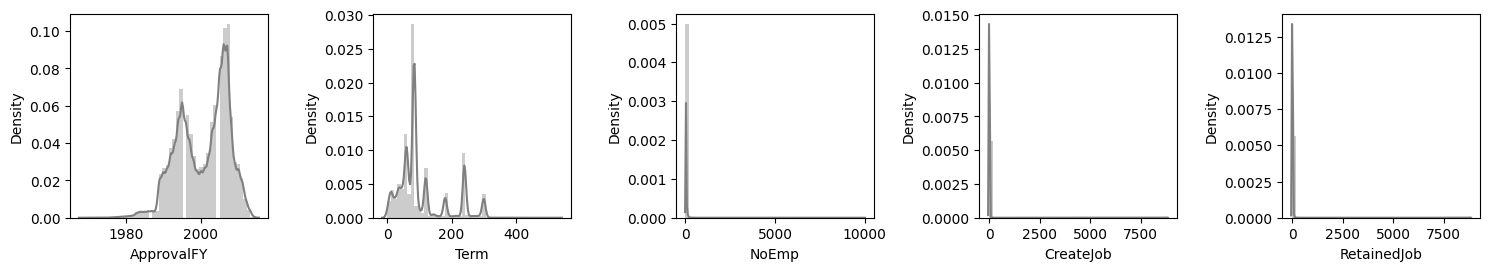

In [65]:
# Histogram nums1
plt.figure(figsize=(15,5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.distplot(df[nums1[i]], color='gray')
    plt.tight_layout()

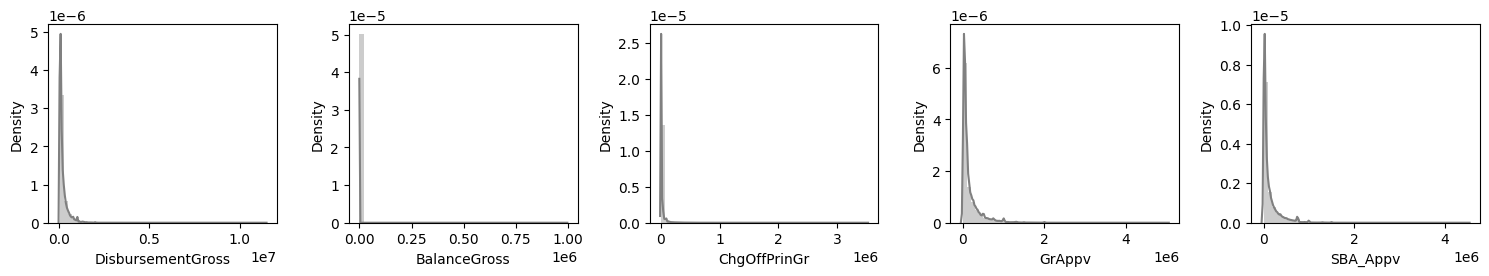

In [66]:
# Histogram nums2
plt.figure(figsize=(15,5))
for i in range(0, len(nums2)):
    plt.subplot(2, len(nums2), i+1)
    sns.distplot(df[nums2[i]], color='gray')
    plt.tight_layout()

Karena tidak berditribusi normal maka menghapus outliers variabel2 tersebut ('NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv') dengan menggunakan metode 1.5IQR, dimana IQR = Q3-Q1

In [67]:
# Menghapus outliers variabel 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 
# 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

dfo = df
for col in ['NoEmp', 'DisbursementGross', 'GrAppv', 'SBA_Appv']:
    Q1 = dfo[col].quantile(0.25)
    Q3 = dfo[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    filtered_entries = ((dfo[col] >= low_limit) & (dfo[col] <= high_limit))
    dfo = dfo[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo)}')

Jumlah baris sebelum memfilter outlier: 610077
Jumlah baris setelah memfilter outlier: 432404


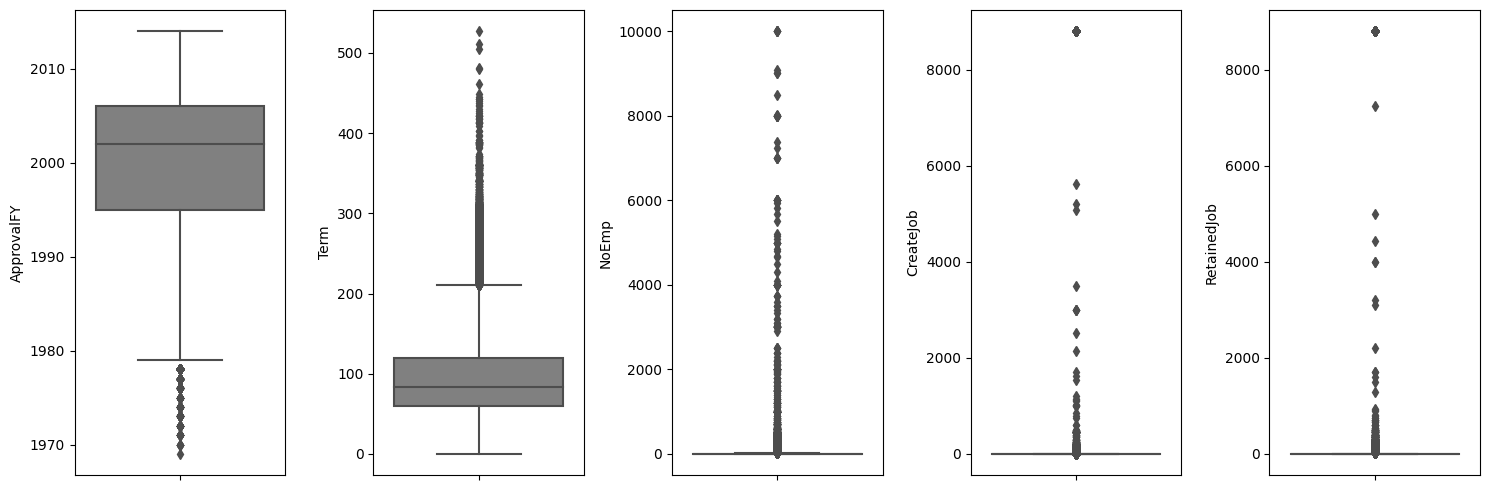

In [68]:
# Boxplot nums1
plt.figure(figsize=(15,5))
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='gray', orient='v')
    plt.tight_layout()

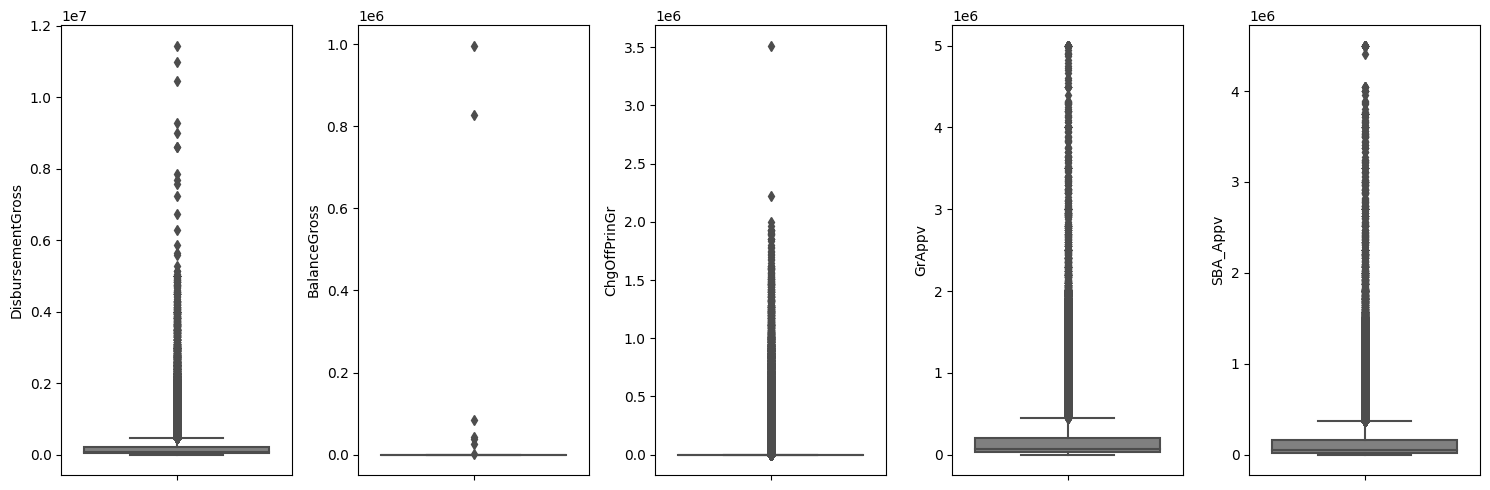

In [69]:
# Boxplot nums2
plt.figure(figsize=(15,5))
for i in range(0, len(nums2)):
    plt.subplot(1, len(nums2), i+1)
    sns.boxplot(y=df[nums2[i]], color='gray', orient='v')
    plt.tight_layout()

Berdasarkan Boxplot nums1 dan nums2 diketahui bahwa masih terdapat outlier pada beberapa feature, sehingga hal ini dapat diatasi dengan menggunakan metode machine learning yang robust terhadap outlier.

### 1.D Feature transformation

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [71]:
#feature transformation
data = df.drop(['Zip', 'Bank', 'FranchiseCode'], axis=1)

In [72]:
le = LabelEncoder()
data['NewExist'] = le.fit_transform(data['NewExist'])
data['UrbanRural'] = le.fit_transform(data['UrbanRural'])
data['RevLineCr'] = le.fit_transform(data['RevLineCr'])
data['LowDoc'] = le.fit_transform(data['LowDoc'])
data['MIS_Status'] = le.fit_transform(data['MIS_Status'])

In [73]:
# Scale the numerical variables using StandardScaler
scaler = StandardScaler()
data[['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = scaler.fit_transform(data[['ApprovalFY', 'Term', 'NoEmp', 
      'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']])

In [74]:
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-0.551028,-0.279711,-0.105724,...,0,0,1,1999-02-28,-0.466071,-0.001986,1,-0.212102,-0.432533,-0.408917
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,0,1,1997-05-31,-0.540980,-0.001986,1,-0.212102,-0.510159,-0.484892
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-0.551028,0.991043,-0.065951,...,0,0,0,1997-12-31,0.384136,-0.001986,1,-0.212102,0.448524,0.385259
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,0,1,1997-06-30,-0.559707,-0.001986,1,-0.212102,-0.529565,-0.503885
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-0.551028,1.785265,0.026853,...,0,0,0,1997-05-14,0.166902,-0.001986,1,-0.212102,0.223409,0.450550


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610077 entries, 0 to 899163
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      610077 non-null  object        
 1   Name               610077 non-null  object        
 2   City               610077 non-null  object        
 3   State              610077 non-null  object        
 4   BankState          610077 non-null  object        
 5   NAICS              610077 non-null  object        
 6   ApprovalDate       610077 non-null  datetime64[ns]
 7   ApprovalFY         610077 non-null  float64       
 8   Term               610077 non-null  float64       
 9   NoEmp              610077 non-null  float64       
 10  NewExist           610077 non-null  int64         
 11  CreateJob          610077 non-null  float64       
 12  RetainedJob        610077 non-null  float64       
 13  UrbanRural         610077 non-null  int64   

### 1.E Feature encoding

In [35]:
# #Feature encoding
# df = data

# # Define categorical columns
# cat_cols = ['City', 'State', 'BankState', 'NAICS']

# # instantiate encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# # fit and transform the data
# encoded_data = encoder.fit_transform(data[cat_cols])

# # create column names for the encoded data
# feature_names = encoder.get_feature_names(cat_cols)

# # convert encoded data to a DataFrame
# encoded_data_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# # concatenate encoded data with numerical data
# final_data = pd.concat([encoded_data_df, data.drop(cat_cols, axis=1)], axis=1)

# # print the final data
# print(final_data.head())


In [36]:
mapping_status = {'CHGOFF' : 1, 'PIF' : 0,}
data['MIS_Status'] = data['MIS_Status'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-0.551028,-0.279711,-0.105724,...,0,0,1,1999-02-28,-0.466071,-0.001986,NaN,-0.212102,-0.432533,-0.408917
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,0,1,1997-05-31,-0.540980,-0.001986,NaN,-0.212102,-0.510159,-0.484892
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-0.551028,0.991043,-0.065951,...,0,0,0,1997-12-31,0.384136,-0.001986,NaN,-0.212102,0.448524,0.385259
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,0,1,1997-06-30,-0.559707,-0.001986,NaN,-0.212102,-0.529565,-0.503885
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-0.551028,1.785265,0.026853,...,0,0,0,1997-05-14,0.166902,-0.001986,NaN,-0.212102,0.223409,0.450550


In [37]:
mapping_status = {'Yes' : 1, 'No' : 0,}
data['RevLineCr'] = data['RevLineCr'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-0.551028,-0.279711,-0.105724,...,0,NaN,1,1999-02-28,-0.466071,-0.001986,NaN,-0.212102,-0.432533,-0.408917
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,NaN,1,1997-05-31,-0.540980,-0.001986,NaN,-0.212102,-0.510159,-0.484892
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-0.551028,0.991043,-0.065951,...,0,NaN,0,1997-12-31,0.384136,-0.001986,NaN,-0.212102,0.448524,0.385259
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,NaN,1,1997-06-30,-0.559707,-0.001986,NaN,-0.212102,-0.529565,-0.503885
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-0.551028,1.785265,0.026853,...,0,NaN,0,1997-05-14,0.166902,-0.001986,NaN,-0.212102,0.223409,0.450550


In [38]:
mapping_status = {'Yes' : 1, 'No' : 0,}
data['LowDoc'] = data['LowDoc'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-0.551028,-0.279711,-0.105724,...,0,NaN,NaN,1999-02-28,-0.466071,-0.001986,NaN,-0.212102,-0.432533,-0.408917
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,NaN,NaN,1997-05-31,-0.540980,-0.001986,NaN,-0.212102,-0.510159,-0.484892
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-0.551028,0.991043,-0.065951,...,0,NaN,NaN,1997-12-31,0.384136,-0.001986,NaN,-0.212102,0.448524,0.385259
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,0,NaN,NaN,1997-06-30,-0.559707,-0.001986,NaN,-0.212102,-0.529565,-0.503885
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-0.551028,1.785265,0.026853,...,0,NaN,NaN,1997-05-14,0.166902,-0.001986,NaN,-0.212102,0.223409,0.450550


In [39]:
mapping_status = {'Yes' : 1, 'No' : 0,}
data['UrbanRural'] = data['UrbanRural'].map(mapping_status)
data.head()

,LoanNr_ChkDgt,Name,City,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,OH,451120.0,1997-02-28,-0.551028,-0.279711,-0.105724,...,NaN,NaN,NaN,1999-02-28,-0.466071,-0.001986,NaN,-0.212102,-0.432533,-0.408917
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,IN,722410.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,NaN,NaN,NaN,1997-05-31,-0.540980,-0.001986,NaN,-0.212102,-0.510159,-0.484892
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,IN,621210.0,1997-02-28,-0.551028,0.991043,-0.065951,...,NaN,NaN,NaN,1997-12-31,0.384136,-0.001986,NaN,-0.212102,0.448524,0.385259
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,OK,0.0,1997-02-28,-0.551028,-0.597400,-0.132240,...,NaN,NaN,NaN,1997-06-30,-0.559707,-0.001986,NaN,-0.212102,-0.529565,-0.503885
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FL,0.0,1997-02-28,-0.551028,1.785265,0.026853,...,NaN,NaN,NaN,1997-05-14,0.166902,-0.001986,NaN,-0.212102,0.223409,0.450550


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610077 entries, 0 to 899163
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      610077 non-null  object        
 1   Name               610077 non-null  object        
 2   City               610077 non-null  object        
 3   State              610077 non-null  object        
 4   BankState          610077 non-null  object        
 5   NAICS              610077 non-null  object        
 6   ApprovalDate       610077 non-null  datetime64[ns]
 7   ApprovalFY         610077 non-null  float64       
 8   Term               610077 non-null  float64       
 9   NoEmp              610077 non-null  float64       
 10  NewExist           610077 non-null  int64         
 11  CreateJob          610077 non-null  float64       
 12  RetainedJob        610077 non-null  float64       
 13  UrbanRural         0 non-null       float64 

### 1.F Handle class imbalance

In [41]:
#Handle class imbalance

In [42]:
minority = data[data['MIS_Status'] == 1]
majority = data[data['MIS_Status'] == 0]

In [43]:
df = data.dropna(subset=['MIS_Status'])

In [44]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Define X and y
X = df.drop(['MIS_Status'], axis=1)
y = df['MIS_Status']

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)

ValueError: ignored

## **2. Feature Engineering**

### 2.A Feature Selection

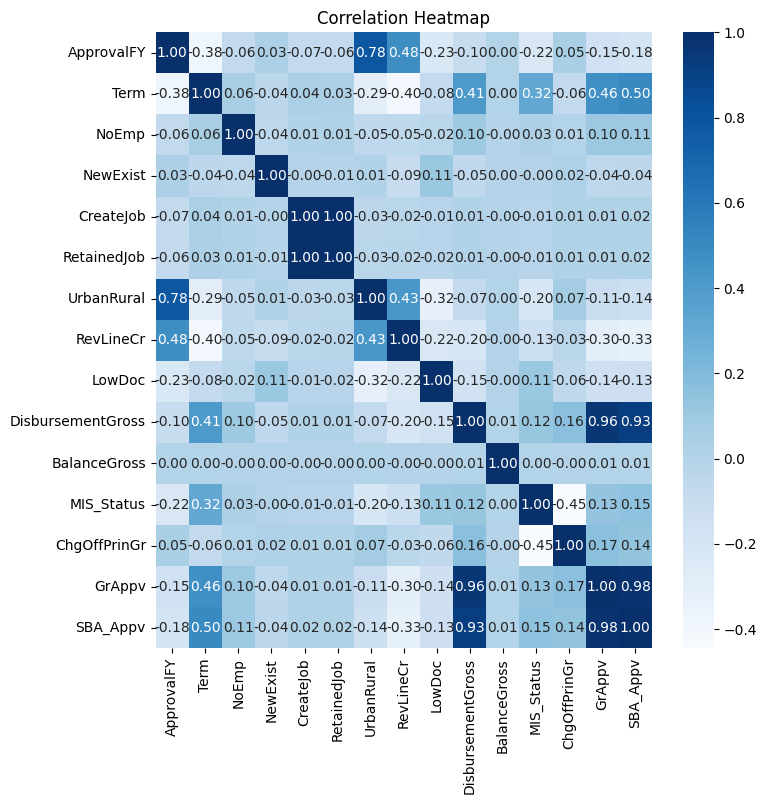

In [75]:
#Membuat Correlation Heatmap

#Correlation Matrix
corr_matrix = data.corr()

#Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan scatterplot yang telah dilakukan pada stage sebelumnya, terlihat bahwa terdapat beberapa feature yang memiliki korelasi yang kuat sehingga perlu dipilih salah satu feature saja yang bisa dilakukan analisis.
Feature yang memiliki korelasi yang kuat diantaranya adalah :
*  CretaeJob dan RetainedJob
*  DisbursementGross dan GrAppv
*  DisbursementGross dan SBA_Appv
*  GrAppv dan SBA_Appv




### 2.B Feature Extraction

In [76]:
def segment(x):
    if x['UrbanRural'] <= 0 :
        segment = 'Undefined'
    elif x['UrbanRural'] <= 1	:
        segment = 'urban'
    else :
        segment = 'rural'
    return segment

In [77]:
df['UrbanRural_new'] = df.apply(lambda x: segment(x), axis = 1)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,UrbanRural_new
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,1997-02-28,1997,...,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,Undefined
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,1997-02-28,1997,...,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,Undefined
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,1997-02-28,1997,...,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,Undefined
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,1997-02-28,1997,...,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,Undefined
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,1997-02-28,1997,...,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,Undefined


**Mengelompokkan Gross Approve menjadi low, mid, high**

In [78]:
#Mencari nilai minimal Gr Appv
min = df['GrAppv'].min()
print(min)

1000.0


In [79]:
#Mencari nilai minimal Gr Appv
max = df['GrAppv'].max()
print(max)

5000000.0


In [80]:
#Mencari interval/range
range = max-min
print(range)

4999000.0


In [81]:
#Panjang kelas
range/3

1666333.3333333333

In [82]:
def gr_class(x):
    if x['GrAppv'] <= 5 :
        gr_class = 'low'
    elif x['GrAppv'] <= 12	:
        gr_class = 'mid'
    else :
        gr_class = 'high'
    return gr_class

In [83]:
df['GrAppv_Class'] = df.apply(lambda x: gr_class(x), axis = 1)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,UrbanRural_new,GrAppv_Class
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,1997-02-28,1997,...,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,Undefined,high
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,1997-02-28,1997,...,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,Undefined,high
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,1997-02-28,1997,...,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,Undefined,high
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,1997-02-28,1997,...,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,Undefined,high
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,1997-02-28,1997,...,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,Undefined,high


**Mengelompokkan SBA Approve menjadi low, mid, high**

In [84]:
#Mencari nilai minimal SBA Appv
min = df['SBA_Appv'].min()
print(min)

500.0


In [85]:
#Mencari nilai maksimal SBA Appv
max = df['SBA_Appv'].max()
print(max)

4500000.0


In [86]:
#Interval
range = max - min
print(range)

4499500.0


In [87]:
#Panjang kelas SBA Appv
range/3

1499833.3333333333

In [88]:
def sba_class(x):
    if x['SBA_Appv'] <= 6.486 :
        sba_class = 'low'
    elif x['SBA_Appv'] <= 13.607	:
        sba_class = 'mid'
    else :
        sba_class = 'high'
    return sba_class

In [89]:
df['SBAAppv_Class'] = df.apply(lambda x: sba_class(x), axis = 1)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,UrbanRural_new,GrAppv_Class,SBAAppv_Class
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711.0,FIFTH THIRD BANK,OH,451120.0,1997-02-28,1997,...,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,Undefined,high,high
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526.0,1ST SOURCE BANK,IN,722410.0,1997-02-28,1997,...,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,Undefined,high,high
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401.0,GRANT COUNTY STATE BANK,IN,621210.0,1997-02-28,1997,...,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,Undefined,high,high
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012.0,1ST NATL BK & TR CO OF BROKEN,OK,0.0,1997-02-28,1997,...,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,Undefined,high,high
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801.0,FLORIDA BUS. DEVEL CORP,FL,0.0,1997-02-28,1997,...,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,Undefined,high,high


### 2.C Feature Tambahan <br>
Feature tambahan yang mungkin akan sangat membantu membuat performansi model semakin bagus diantaranya adalah sebagai berikut :
1. Feature rata-rata penghasilan per bulan usaha kecil. Feature ini berbentuk numerik yang dapat dijadikan pertimbangan bagi SBA dalam menentukan jaminan. 
2. Feature rata-rata pengeluaran per bulan usaha kecil. Feature ini berbentuk numerik yang dapat dijadikan pertimbangan bagi SBA dalam menentukan jaminan.
3. Feature jenis industri, untuk dilihat dari segi risiko, karena semua industri memiliki risiko masing-masing. Seperti contohnya pada perusahaan pertanian yang memiliki risiko gagal panen, maka dapat diragukan kemampuan membayar pinjamannya. Informasi datanya bisa didaptkan saat peminjaman melampirkan infromasi perusahaannya. Dan untuk menggunakan feature ini, maka SBA harus lebih memerhatikan kondisi yang bisa berhubungan dengan industri peminjam.
4. Feature jumlah aset, untuk menilai kelayakan peminjaman uang dan kemampuan membayar kembali pinjaman. Mengetahui jumlah aset dari sebuah perusahaan dapat membantu dalam menilai kelayakan mereka untuk meminjam uang dan membayar kembali pinjaman tersebut.
5. Feature riwayat pembayaran tagihan, tagihan bulanan seperti tagihan listrik apakah dibayarkan tepat pada waktunya. Riwayat ini dapat mencerminkan stabilitas bisnis dan potensi penghasilan perusahaan di masa depan, yang bisa digunakan untuk memproyeksi apakah peminjam mampu membayar pinjamannya. Untuk mendapatkan data ini, maka peminjam harus melampirkan rekap pembayaran transaksi yang nantinya bisa diubah ke data atau segmentasi data yang diperlukan.

# **Terima Kasih**